### 스타워즈

### 라이브 러리

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import warnings
warnings.simplefilter('ignore')

### 데이터 로드

In [3]:
starwars = pd.read_csv('../../data/dataset/Starwars.csv')
starwars.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


### 데이터 탐색

In [4]:
starwars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


- name : 캐릭터 명
- height : 키
- mass : 몸무게
- hair_color : 머리카락 색
- skin_color : 피부 색
- eye_color : 눈동자 색
- birth_year : 출생년도
- sex : 생물학적 성별
- gender : 생물학적 성별
- homeworld : 고향 
- species : 종

- 범주형 변수 : 빈도(Frequency) 계산
    - name, hair_color, skin_color, eye_color, sex, gender, homeworld, species

- 연속형 변수 : 수치 계산 가능
    - key, mass, birth_year

In [5]:
starwars.shape

(87, 11)

In [6]:
starwars.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [7]:
starwars.describe(include=object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


#### 1) 범주형 컬럼 안에 들어있는 유니크한 값 확인

In [8]:
starwars.drop_duplicates(inplace=True)

In [9]:
starwars['skin_color'].unique()

array(['fair', 'gold', 'white, blue', 'white', 'light', 'white, red',
       'unknown', 'green', 'green-tan, brown', 'pale', 'metal', 'dark',
       'brown mottle', 'brown', 'grey', 'mottled green', 'orange',
       'blue, grey', 'grey, red', 'red', 'blue', 'grey, green, yellow',
       'yellow', 'tan', 'fair, green, yellow', 'grey, blue',
       'silver, red', 'green, grey', 'red, blue, white', 'brown, white',
       'none'], dtype=object)

In [10]:
starwars['hair_color'].unique()

array(['blond', nan, 'none', 'brown', 'brown, grey', 'black',
       'auburn, white', 'auburn, grey', 'white', 'grey', 'auburn',
       'blonde', 'unknown'], dtype=object)

In [11]:
starwars['eye_color'].unique()

array(['blue', 'yellow', 'red', 'brown', 'blue-gray', 'black', 'orange',
       'hazel', 'pink', 'unknown', 'red, blue', 'gold', 'green, yellow',
       'white', 'dark'], dtype=object)

In [12]:
starwars['gender'].unique()

array(['masculine', 'feminine', nan], dtype=object)

In [13]:
starwars['sex'].unique()

array(['male', 'none', 'female', 'hermaphroditic', nan], dtype=object)

In [14]:
starwars['homeworld'].unique()

array(['Tatooine', 'Naboo', 'Alderaan', 'Stewjon', 'Eriadu', 'Kashyyyk',
       'Corellia', 'Rodia', 'Nal Hutta', 'Bestine IV', nan, 'Kamino',
       'Trandosha', 'Socorro', 'Bespin', 'Mon Cala', 'Chandrila', 'Endor',
       'Sullust', 'Cato Neimoidia', 'Coruscant', 'Toydaria', 'Malastare',
       'Dathomir', 'Ryloth', 'Vulpter', 'Troiken', 'Tund', 'Haruun Kal',
       'Cerea', 'Glee Anselm', 'Iridonia', 'Iktotch', 'Quermia', 'Dorin',
       'Champala', 'Geonosis', 'Mirial', 'Serenno', 'Concord Dawn',
       'Zolan', 'Ojom', 'Aleen Minor', 'Skako', 'Muunilinst', 'Shili',
       'Kalee', 'Umbara', 'Utapau'], dtype=object)

In [15]:
starwars['species'].unique()

array(['Human', 'Droid', 'Wookiee', 'Rodian', 'Hutt', "Yoda's species",
       'Trandoshan', 'Mon Calamari', 'Ewok', 'Sullustan', 'Neimodian',
       'Gungan', nan, 'Toydarian', 'Dug', 'Zabrak', "Twi'lek",
       'Vulptereen', 'Xexto', 'Toong', 'Cerean', 'Nautolan', 'Tholothian',
       'Iktotchi', 'Quermian', 'Kel Dor', 'Chagrian', 'Geonosian',
       'Mirialan', 'Clawdite', 'Besalisk', 'Kaminoan', 'Aleena',
       'Skakoan', 'Muun', 'Togruta', 'Kaleesh', "Pau'an"], dtype=object)

- 범주가 적을 수록 범주별 그래프를 그리기 쉬움(sex, gender)

#### 어떤 컬럼에 NaN값이 있는지 확인

In [16]:
starwars.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

#### 총 데이터 갯수

In [17]:
total = starwars.shape[0] * starwars.shape[1]
total

957

#### 총 결측치 비율

In [18]:
# 총 결측치
ratio = (starwars.isnull().sum().sum() * 100) / total
print('총 결측치 수 : {}, 결측치 비율 : {:.2f}%'.format(starwars.isnull().sum().sum(), ratio))

총 결측치 수 : 105, 결측치 비율 : 10.97%


#### 스타워즈에 등장하는 전제 인물의 숫자

In [19]:
# starwars['name'].nunique()
len(starwars.drop_duplicates('name'))

87

#### 스타워즈에 등장하는 종족 숫자

In [20]:
starwars['species'].nunique()
# len(starwars.drop_duplicates('species'))

37

#### 데이터 전처리

In [21]:
starwars.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

#### 1) NaN 처리

- drop
- fillna

In [22]:
# height mass 컬럼의 NaN ==> 0 으로 채우기

starwars['height'].fillna(0,inplace=True)
starwars['mass'].fillna(0,inplace=True)

In [23]:
starwars

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,0.0,0.0,brown,light,hazel,NaN,female,feminine,NaN,Human
83,Poe Dameron,0.0,0.0,brown,light,brown,NaN,male,masculine,NaN,Human
84,BB8,0.0,0.0,none,none,black,NaN,none,masculine,NaN,Droid
85,Captain Phasma,0.0,0.0,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [24]:
starwars.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [25]:
starwars['sex'].unique()

array(['male', 'none', 'female', 'hermaphroditic', nan], dtype=object)

In [26]:
starwars[starwars['sex'] == 'none'] # starwars['sex'](np.nan일 ) == np.nan (안됨)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid
72,R4-P17,96.0,0.0,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid
84,BB8,0.0,0.0,none,none,black,NaN,none,masculine,NaN,Droid


In [27]:
starwars[starwars['sex'].isnull()] # starwars['sex'](np.nan일 때) == np.nan (안됨)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
36,Ric Oli?,183.0,0.0,brown,fair,blue,NaN,NaN,NaN,Naboo,NaN
39,Quarsh Panaka,183.0,0.0,black,dark,brown,62.0,NaN,NaN,Naboo,NaN
79,Sly Moore,178.0,48.0,none,pale,white,NaN,NaN,NaN,Umbara,NaN
85,Captain Phasma,0.0,0.0,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


#### sex == none 인 경우 sex 컬럼의 값을  'robot' 변경

In [28]:
starwars.loc[starwars['sex'] == 'none','sex'] = 'robot'
# df.columns.str.replace('2022년06월_계_','')

In [29]:
starwars['sex'].unique()

array(['male', 'robot', 'female', 'hermaphroditic', nan], dtype=object)

### EDA & Visualization

#### 1) 스타워즈 캐릭터의 성별 비율 알아보기

In [30]:
print(starwars['sex'].unique()) # sex 컬럼에 들어있는 값(중복 값 제거) 확인
print(starwars['sex'].nunique())
print(starwars['sex'].value_counts()) # 각 요소? 들의 합?

['male' 'robot' 'female' 'hermaphroditic' nan]
4
male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64


In [31]:
print(starwars['gender'].value_counts())
starwars['gender']

masculine    66
feminine     17
Name: gender, dtype: int64


0     masculine
1     masculine
2     masculine
3     masculine
4      feminine
        ...    
82     feminine
83    masculine
84    masculine
85          NaN
86     feminine
Name: gender, Length: 87, dtype: object

#### 성별 파이차트 작성

Text(0, 0.5, '')

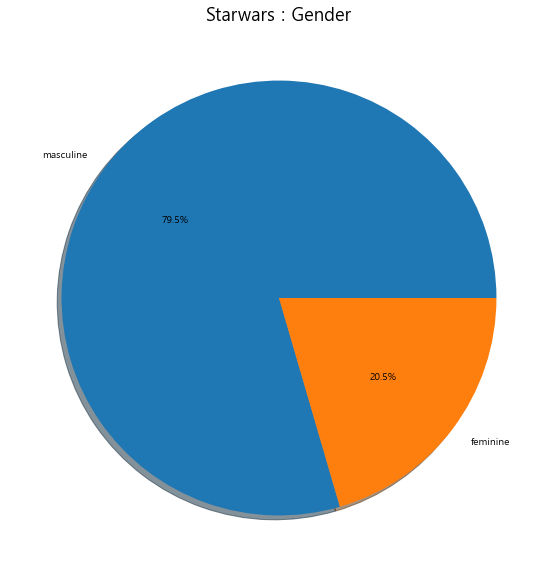

In [32]:
ax = starwars['gender'].value_counts().plot.pie(autopct='%.1f%%', figsize=(10,10), shadow=True)
ax.set_title('Starwars : Gender', size=18)
ax.set_ylabel('')

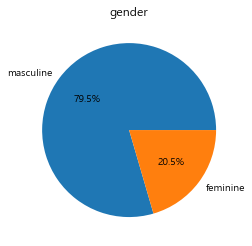

In [33]:
labels = ['masculine','feminine']
plt.title('gender')
plt.pie(starwars['gender'].value_counts(),labels=labels, autopct= '%.1f%%')

# plt.pie(starwars['sex'].value_counts(), labels = starwars['sex'].unique()[:-1], autopct='%.1f%%')
plt.show()

<AxesSubplot:xlabel='count', ylabel='sex'>

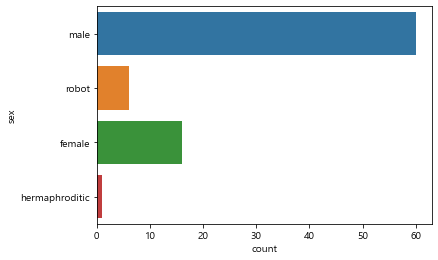

In [49]:
# starwars['sex'] 이용해서 성별 차트 작성(countplot)

sns.countplot(data=starwars, y='sex')

#### 2) 스타워즈 캐릭터의 성별에 따른 신장의 분포 알아보기

In [34]:
starwars['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [35]:
print('왜도 : %f' % starwars['height'].skew())
print('첨도 : %f' % starwars['height'].kurt())

왜도 : -1.760878
첨도 : 2.927697


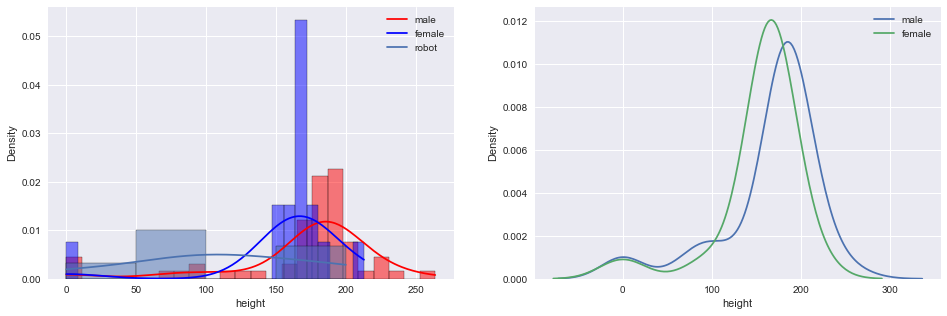

In [54]:
plt.style.use('seaborn')
flg, ax = plt.subplots(1,2,figsize=(16,5))

sns.histplot(starwars[starwars['sex'] == 'male']['height'], ax=ax[0], kde=True, stat='density', color='red')
sns.histplot(starwars[starwars['sex'] == 'female']['height'], ax=ax[0], kde=True, stat='density', color='blue')
sns.histplot(starwars[starwars['sex'] == 'robot']['height'], ax=ax[0], kde=True, stat='density')
ax[0].legend(['male','female','robot'])

# kdeplot : 확률분포를 부드럽게 그려줄
sns.kdeplot(starwars[starwars['gender'] == 'masculine']['height'],ax=ax[1])
sns.kdeplot(starwars[starwars['gender'] == 'feminine']['height'],ax=ax[1])
ax[1].legend(['male','female'])

#### 3) 가장 무거운 캐릭터와 가장 가벼운 캐릭터 알아보기

- 가장 가벼운 캐릭터 구하기(단, 0은 아닌)

In [36]:
starwars[starwars['mass'] != 0].sort_values('mass').head(1)
df1 = starwars[starwars['mass'] != 0]
df1

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,robot,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,robot,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human
6,Beru Whitesun lars,165.0,75.0,brown,light,blue,47.0,female,feminine,Tatooine,Human
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,robot,masculine,Tatooine,Droid
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.0,male,masculine,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.0,male,masculine,Stewjon,Human


In [37]:
min(df1['mass'])

15.0

In [38]:
max(df1['mass'])

1358.0

In [39]:
df1[df1['mass'] == min(df1['mass'])]['name'].values

array(['Ratts Tyerell'], dtype=object)

In [40]:
df1[df1['mass'] == max(df1['mass'])]['name'].values

array(['Jabba Desilijic Tiure'], dtype=object)

In [41]:
print("{}의 몸무게가 {}로 가장 가볍다. ".format(df1[df1['mass'] == min(df1['mass'])]['name'].values, min(df1['mass'])))
print("{}의 몸무게가 {}로 가장 무겁다. ".format(df1[df1['mass'] == max(df1['mass'])]['name'].values, max(df1['mass'])))

['Ratts Tyerell']의 몸무게가 15.0로 가장 가볍다. 
['Jabba Desilijic Tiure']의 몸무게가 1358.0로 가장 무겁다. 


#### 4) 스타워즈 캐릭터의 종족간 몸무게 비교

In [42]:
weight = starwars[['species','mass']].groupby('species').mean()
weight.head(3)

,mass
species,
Aleena,15.0
Besalisk,102.0
Cerean,82.0


In [43]:
# 몸무게 많은 순으로 상위 10개 종족의 평균 몸무게 그래프 작성

In [44]:
weight_sort = weight.sort_values('mass', ascending=False)
weight_sort.head(10)

,mass
species,
Hutt,1358.0
Kaleesh,159.0
Wookiee,124.0
Trandoshan,113.0
Besalisk,102.0
Neimodian,90.0
Nautolan,87.0
Mon Calamari,83.0
Cerean,82.0


<AxesSubplot:xlabel='species'>

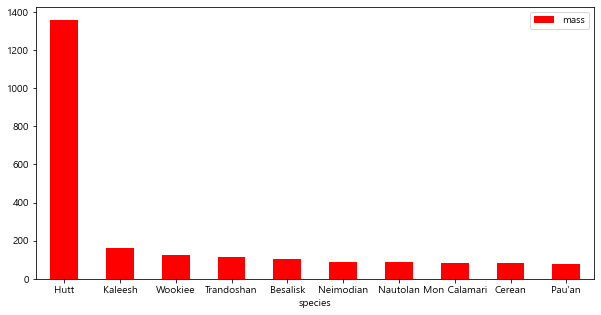

In [45]:
weight_sort.iloc[:10].plot.bar(color='r',rot=0,figsize=(10,5))

#### 5) 스타워즈 캐릭터의 몸무게 - 키 상관관계

- 몸무게가 1358, 0인 캐릭터 제외

In [55]:
starwars.shape

(87, 11)

In [56]:
out1 = ~starwars['species'].isin(['Hutt'])

In [57]:
out2 = ~starwars['mass'].isin([0.0])

In [59]:
starwars.loc[out1 & out2].shape

(58, 11)

<AxesSubplot:xlabel='height', ylabel='mass'>

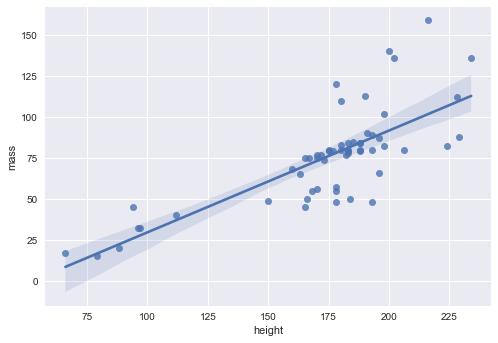

In [60]:
sns.regplot(data=starwars.loc[out1 & out2], x='height', y='mass')

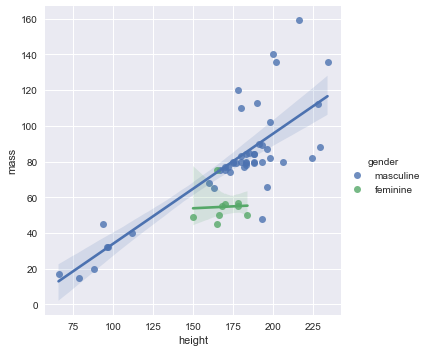

In [62]:
sns.lmplot(data=starwars.loc[out1 & out2], x='height', y='mass', hue='gender')